 # **TP1: Introduction à Tensorflow avec keras**

## 1- Utiliser tensorflow avec keras

Le module keras permet de définir facilement des réseaux de neurones en les décrivant couche par couche.
Pour l’instant nous définissons les poids à la main, en attendant de voir plus tard comment les calculer à la
machine. 

Ceux qui ne veulent pas s’embêter avec les détails techniques peuvent seulement lire la sous-section 1.2 car
nous proposerons ensuite un outil simple dans la partie 2

## 1.1. Module keras de tensorflow
En plus d’importer le module numpy (abrégé par np), il faut importer le sous-module keras du module
tensorflow et quelques outils spécifiques

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 1.2. Couches de neurones
On va définir l’architecture d’un réseau très simple, en le décrivant couche par couche

In [2]:
# Architecture du réseau
modele = Sequential()
# Couches de neurones
modele.add(Dense(2, input_dim=1, activation='relu'))
modele.add(Dense(1, activation='relu'))

Explications :

• Notre réseau s’appelle modele, il est du type Sequential, c’est-à-dire qu’il va être décrit par une suite
de couches les unes à la suite des autres.

• Chaque couche est ajoutée à la précédente par modele.add(). L’ordre d’ajout est donc important.

• Chaque couche est ajoutée par une commande :
modele.add(Dense(nb_neurones, activation=ma_fonction))

• Une couche de type Dense signifie que chaque neurone de la nouvelle couche est connecté à toutes les
sorties des neurones de la couche précédente.

• Pour chaque couche, il faut préciser le nombre de neurones qu’elle contient. S’il y a n neurones alors la
couche renvoie n valeurs en sortie. On rappelle qu’un neurone renvoie la même valeur de sortie vers
tous les neurones de la couche suivante.

• Pour la première couche, il faut préciser le nombre de valeurs en entrée (par l’option input_dim =
...). Ici on a une entrée d’une seule variable. Sur la figure ci-dessous un exemple d’une entrée de
dimension 3.

• Pour les autres couches, le nombre d’entrées est égal au nombre de sorties de la couche précédente. Il
n’est donc pas nécessaire de le préciser.

• Pour chaque couche, il faut également préciser une fonction d’activation (c’est la même pour tous les
neurones de cette couche). Plusieurs fonctions d’activation sont prédéfinies :
'relu' (ReLU), 'sigmoid'(σ), 'linear' (identité)PYTHON : TENSORFLOW AVEC KERAS - PARTIE 1 97
Nous verrons plus tard comment définir notre propre fonction d’activation, comme par exemple la
fonction marche de Heaviside.

• Notre exemple ne possède qu’une entrée et comme il n’y a qu’un seul neurone sur la dernière couche alors
il n’y a qu’une seule valeur en sortie. Ainsi notre réseau va définir une fonction F.

• Mais attention, pour l’instant ce n’est qu’un modèle de réseau puisque nous n’avons pas fixé de poids.

• Pour vérifier que tout va bien jusque là, on peut exécuter la commande
modele.summary()
qui affiche un résumé des couches et du nombre de poids à définir.

## 1.3 Les poids 
Lors de la définition d’un réseau et de la structure de ses couches, des poids aléatoires sont attribués à
chaque neurone. La démarche habituelle est ensuite d’entraîner le réseau, automatiquement, afin qu’il
trouve de « bons » poids. Pour l’instant, nous continuons de fixer les poids de chaque neurone à la main.
La commande pour fixer les poids est set_weights().

Voici les poids de la première couche, numérotée 0 :

In [3]:
# Couche 0
coeff = np.array([[1.,-0.5]])
biais = np.array([-1,1])
poids = [coeff,biais]
modele.layers[0].set_weights(poids)

Définissons les poids de la couche numéro 1

In [4]:
# Couche 1
coeff = np.array([[1.0],[1.0]])
biais = np.array([0])
poids = [coeff,biais]
modele.layers[1].set_weights(poids)

Voici quelques précisions concernant la commande set_weights(). Son utilisation n’est pas très aisée.

• Les poids sont définis pour tous les éléments d’une couche, par une commande set_weights(poids).

• Les poids sont donnés sous la forme d’une liste : poids = [coeff,biais].

• Les biais sont donnés sous la forme d’un vecteur de biais (un pour chaque neurone).

• Les coefficients sont donnés sous la forme d’un tableau à deux dimensions. Il sont définis par entrée.

Attention, la structure n’est pas naturelle (nous y reviendrons).
Pour vérifier que les poids d’une couche sont corrects, on utilise la commande get_weights(), par exemple
pour la première couche :  modele.layers[0].get_weights()


Cette instruction renvoie les poids sous la forme d’une liste [coefficients,biais] du type :
[ [[ 1. -0.5]], [-1. 1.] ]
Astuce! Cette commande est aussi très pratique avant même de fixer les poids, pour savoir quelle est la
forme que doivent prendre les poids afin d’utiliser set_weights().




## 1.4 Évaluation
Comment utiliser le réseau ? C’est très simple avec predict(). Notre réseau définit une fonction F(x).
L’entrée correspond donc à un réel et la sortie également. Voici comment faire :

In [5]:
entree = np.array([[3.0]])
sortie = modele.predict(entree)

Ici sortie vaut [[2.0]] et donc F(3) = 2. Ce que l’on peut vérifier à la main en calculant les sorties de
chaque neurone.

## 1.5 Visualisation
Afin de tracer le graphe de la fonction F,  on peut calculer d’autres valeurs :

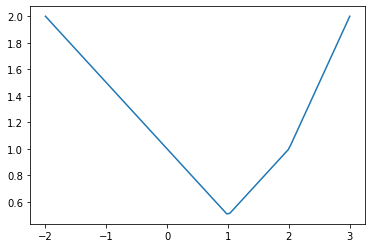

In [6]:
liste_x = np.linspace(-2, 3, num=100)
entree = np.array([[x] for x in liste_x])
sortie = modele.predict(entree)
liste_y = np.array([y[0] for y in sortie])
plt.plot(liste_x,liste_y)
plt.show()

## 1.6. Autre exemple

In [7]:
modele = Sequential()
# Couches de neurones
modele.add(Dense(3, input_dim=2, activation='sigmoid'))
modele.add(Dense(1, activation='sigmoid'))
# Couche 0
coeff = np.array([[1.0,3.0,-5.0],[2.0,-4.0,-6.0]])
biais = np.array([-1.0,0.0,1.0])
poids = [coeff,biais]
modele.layers[0].set_weights(poids)
# Couche 1
coeff = np.array([[1.0],[1.0],[1.0]])
biais = np.array([-3.0])
poids = [coeff,biais]
modele.layers[1].set_weights(poids)


In [8]:
entree = np.array([[7,-5]])
sortie = modele.predict(entree)

In [9]:
sortie

array([[0.12303182]], dtype=float32)

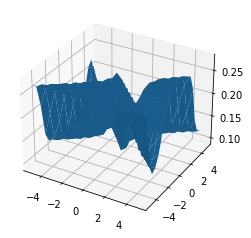

In [10]:
from mpl_toolkits.mplot3d import Axes3D
VX = np.linspace(-5, 5, 20)
VY = np.linspace(-5, 5, 20)
X,Y = np.meshgrid(VX, VY)
entree = np.c_[X.ravel(), Y.ravel()]
sortie = modele.predict(entree)
Z = sortie.reshape(X.shape)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()